# 1. Importing the possibly required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline

In [ ]:
# 2. Loading the data into the data frame

In [3]:
df_data=pd.read_csv('webmd.csv', na_values=' ')
df_data.shape

(362806, 12)

In [4]:
#to display the top 5 rows
df_data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1


In [5]:
#to display the bottom 5 rows
df_data.tail(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,NaN,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,NaN,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


# 3. Checking the dataframe detail

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
Age              350604 non-null object
Condition        362763 non-null object
Date             362806 non-null object
Drug             362806 non-null object
DrugId           362806 non-null int64
EaseofUse        362806 non-null int64
Effectiveness    362806 non-null int64
Reviews          320945 non-null object
Satisfaction     362806 non-null int64
Sex              336269 non-null object
Sides            345346 non-null object
UsefulCount      362806 non-null int64
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


# 4. Dropping irrelevant columns

In [7]:
df_data=df_data.drop(['Date', 'DrugId', 'Reviews', 'Sides', 'UsefulCount'], axis=1)

In [8]:
#to display the random 5 rows
df_data.sample(5)

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
88965,55-64,Type of Leukemia - Acute Lymphocytic Leukemia,methotrexate,2,4,3,Female
166726,65-74,Other,salex shampoo,3,1,1,Female
47901,45-54,Pain,nucynta,5,5,5,Female
165924,45-54,Chronic Trouble Sleeping,zzzquil,5,1,1,Female
138280,45-54,Chronic Trouble Sleeping,rozerem,5,1,1,Female


# 5. Renaming the columns

In [9]:
df_data=df_data.rename(columns={"Satisfaction": "Rating"})
df_data.head(5)

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
0,75 or over,Stuffy Nose,25dph-7.5peh,5,5,5,Male
1,25-34,Cold Symptoms,25dph-7.5peh,5,5,5,Female
2,65-74,Other,warfarin (bulk) 100 % powder,2,3,3,Female
3,75 or over,Other,warfarin (bulk) 100 % powder,2,2,1,Female
4,35-44,Other,warfarin (bulk) 100 % powder,1,1,1,Male


# 6. Dropping the unused rows

In [10]:
#selecting the rows of our target which is pain condition  
df_data=df_data[df_data.Condition.str.contains('Pain', na=False)]
df_data.shape

(53649, 7)

In [11]:
#to display the random 5 rows
df_data.sample(5)

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
286209,55-64,Pain,hydrocodone-acetaminophen,5,4,4,Male
55314,45-54,Pain,"oxycodone tablet, oral only",4,3,3,Male
183500,35-44,Pain,tramadol hcl er,4,3,3,Female
50246,35-44,Pain,oxycodone hcl solution,2,3,2,Female
341999,75 or over,Leg Pain when Walking; Absent at Rest,cilostazol,5,5,5,NaN


# 7. Data Cleaning and Manupulation

In [12]:
#calculate the total null vaues in each column:
df_data.isna().sum()

Age              1905
Condition           0
Drug                0
EaseofUse           0
Effectiveness       0
Rating              0
Sex              3698
dtype: int64

In [13]:
#since Age and Sex are both the determining variable through out this project, 
#they cant be null, hence drop the null values from data set
df_data.dropna(inplace=True)
df_data.shape

(49313, 7)

In [14]:
#check types drug used for pain reliever
df_data['Drug'].nunique()

606

In [15]:
#check age demography
df_data.Age.value_counts()

45-54         13966
55-64         11851
35-44          8579
25-34          5545
65-74          5215
19-24          1962
75 or over     1738
13-18           410
7-12             21
3-6              14
0-2              12
Name: Age, dtype: int64

# 8 Univariate Data Analysis

##### Extracting Female users across Age group

In [16]:
#Exrtacting female users
df_female=df_data[df_data['Sex']=='Female']

In [17]:
#The average ease of use, effectivess and rating for all age group of female
df_female.groupby('Age').mean()

,EaseofUse,Effectiveness,Rating
Age,,,
0-2,2.714286,3.285714,3.142857
13-18,4.016892,3.307432,2.912162
19-24,4.210140,3.625276,3.243204
25-34,4.112437,3.521612,3.248475
3-6,3.777778,3.666667,3.444444
35-44,4.111505,3.493590,3.276991
45-54,4.129394,3.474443,3.241712
55-64,4.177722,3.509804,3.274371
65-74,4.188132,3.509292,3.289534


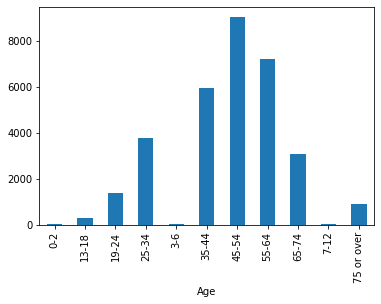

In [18]:
#univariate data (plot of age distribution) of female
df_female.groupby('Age')['Sex'].count().plot(kind='bar')

In [19]:
#Exrtacting female users
df_male=df_data[df_data['Sex']=='Male']

In [20]:
#The average ease of use, effectivess and rating for all age group of male
df_male.groupby('Age').mean()

,EaseofUse,Effectiveness,Rating
Age,,,
0-2,4.200000,4.400000,4.200000
13-18,4.263158,3.666667,3.377193
19-24,4.276206,3.668885,3.430948
25-34,4.310598,3.673055,3.483089
3-6,2.000000,2.800000,2.600000
35-44,4.313844,3.701999,3.528480
45-54,4.225793,3.580958,3.416010
55-64,4.289270,3.570172,3.407725
65-74,4.198790,3.440410,3.297020


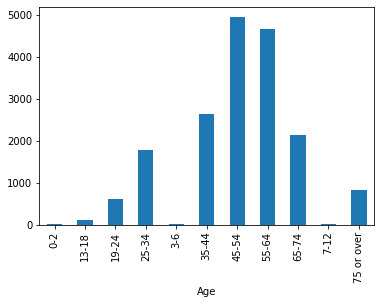

In [21]:
#univariate data (plot of age distribution) of male
df_male.groupby('Age')['Sex'].count().plot(kind='bar')

# 9. Bivariate Data Analysis (Frequency and Density Histograms Plots)

#### 9.1 Frequency Hinstogram

##### Frequency Histogram of top five Drug by Age and Sex

In [22]:
#replace age range with approximate average age for simplicity
df_data['Age'].replace(['0-2','3-6','7-12','13-18','19-24','25-34','35-44','45-54','55-64','65-74','75 or over'],
                  [1,5,10,15,20,30,40,50,60,70,80], inplace=True)

In [23]:
df_data.sample(5)

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
58339,50,Pain,oxycodone hcl er,5,5,5,Female
286820,40,Pain,hydrocodone-acetaminophen,5,2,2,Female
332444,70,Rheumatic Disease causing Pain & Stiffness in ...,diclofenac submicronized capsule,5,3,2,Male
189248,40,Pain,tramadol hcl,4,1,1,Female
168203,50,Pain,zipsor,5,5,5,Male


In [ ]:
#Frequency Histogram

Text(0, 0.5, 'Drug Frequency')

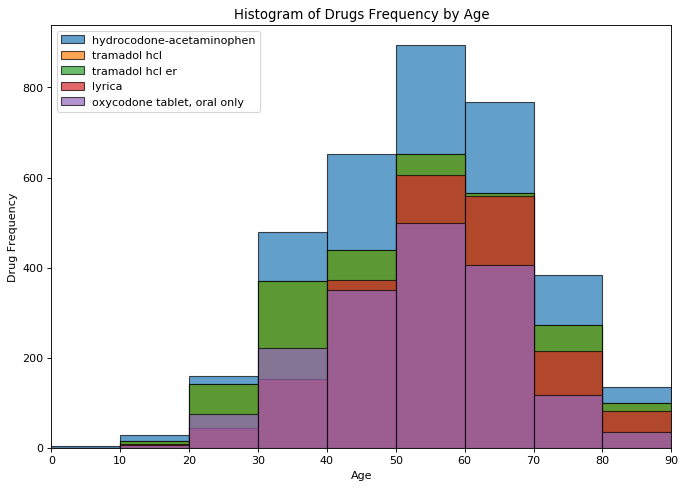

In [24]:
# Extract top five drugs used the most 
drug_data=pd.Series(df_data.groupby('Drug')['Drug'].count())
drug_data=drug_data.sort_values(ascending=False)
top_five=drug_data.index[:5]

# Subset to the top 5 drugs
top_five_drug=df_data[df_data['Drug'].isin(top_five)]

#figure size
plt.figure(figsize=(10,7), dpi= 80)
bins=[0,10,20,30,40,50,60,70,80, 90]

# Iterate through each of the five drugs
for medicine in top_five:
    subset=top_five_drug[top_five_drug['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Frequency by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

In [26]:
df_female=df_data[df_data['Sex']=='Female']

In [27]:
df_male=df_data[df_data['Sex']=='Male']

Text(0, 0.5, 'Drug Frequency')

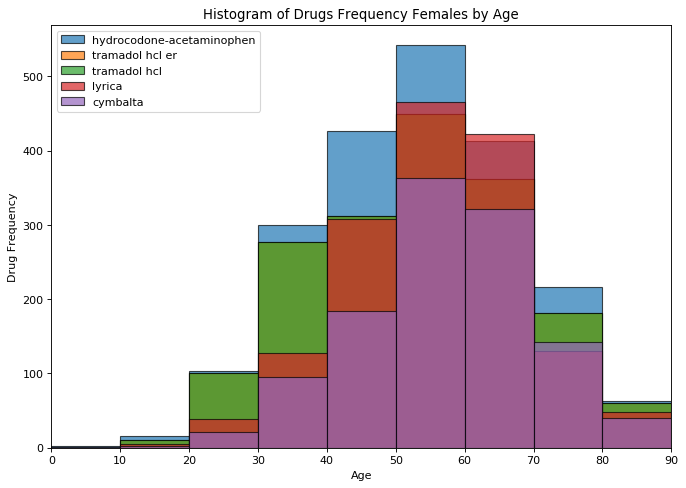

In [28]:
# Extract top five drugs used the most among Female users
drug_female=pd.Series(df_female.groupby('Drug')['Drug'].count())
drug_female=drug_female.sort_values(ascending=False)
top_five_female=drug_female.index[:5]

# Subset to the top 5 drugs
top_five_drug_female=df_female[df_female['Drug'].isin(top_five_female)]

#figure size
plt.figure(figsize=(10,7), dpi= 80)
bins=[0,10,20,30,40,50,60,70,80, 90]

# Iterate through each of the five drugs
for medicine in top_five_female:
    subset=top_five_drug_female[top_five_drug_female['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Frequency Females by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

Text(0, 0.5, 'Drug Frequency')

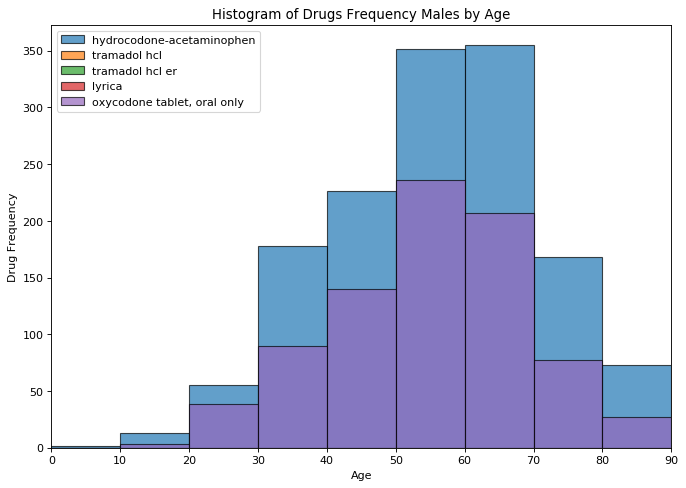

In [29]:
# Extract top five drugs used the most among male users
drug_male=pd.Series(df_male.groupby('Drug')['Drug'].count())
drug_male=drug_male.sort_values(ascending=False)
top_five_male=drug_male.index[:5]

# Subset to the top 5 drugs
top_five_drug_male=df_male[df_male['Drug'].isin(top_five_male)]

#figure size
plt.figure(figsize=(10,7), dpi= 80)
bins=[0,10,20,30,40,50,60,70,80, 90]

# Iterate through each of the five drugs
for medicine in top_five:
    subset=top_five_drug_male[top_five_drug_male['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Frequency Males by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

#### Frequency Histogram of EaseofUse for top five drugs

Text(0.5, 1.0, 'Histogram of EaseofUse Frequency')

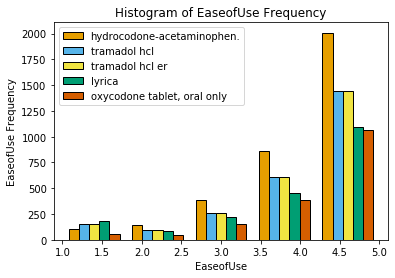

In [30]:
# Extract EaseofUse for top five drugs used  
x1 = list(df_data[df_data['Drug'] == 'hydrocodone-acetaminophen']['EaseofUse'])
x2 = list(df_data[df_data['Drug'] == 'tramadol hcl']['EaseofUse'])
x3 = list(df_data[df_data['Drug'] == 'tramadol hcl er']['EaseofUse'])
x4 = list(df_data[df_data['Drug'] == 'lyrica']['EaseofUse'])
x5 = list(df_data[df_data['Drug'] == 'oxycodone tablet, oral only']['EaseofUse'])

# Assign colors for each Drug and EaseofUse
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.hist([x1, x2, x3, x4, x5], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse')
plt.ylabel('EaseofUse Frequency')
plt.title('Histogram of EaseofUse Frequency')

In [ ]:
#### Frequency Histogram of EaseofUse for top five drugs among Female Users

Text(0.5, 1.0, 'Histogram of EaseofUse Frequency of Female')

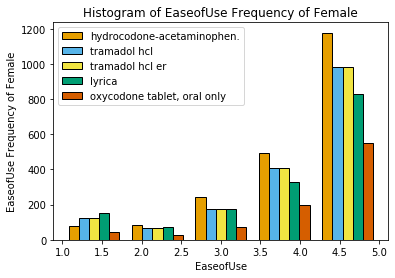

In [35]:
# Extract EaseofUse for top five drugs used  
x1 = list(df_female[df_female['Drug'] == 'hydrocodone-acetaminophen']['EaseofUse'])
x2 = list(df_female[df_female['Drug'] == 'tramadol hcl']['EaseofUse'])
x3 = list(df_female[df_female['Drug'] == 'tramadol hcl er']['EaseofUse'])
x4 = list(df_female[df_female['Drug'] == 'lyrica']['EaseofUse'])
x5 = list(df_female[df_female['Drug'] == 'oxycodone tablet, oral only']['EaseofUse'])

# Assign colors for each Drug and EaseofUse
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.hist([x1, x2, x3, x4, x5], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse')
plt.ylabel('EaseofUse Frequency of Female')
plt.title('Histogram of EaseofUse Frequency of Female')

In [ ]:
#### Frequency Histogram of EaseofUse for top five drugs among Male Users

Text(0.5, 1.0, 'Histogram of EaseofUse Frequency of Male')

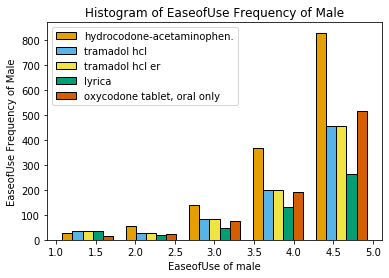

In [38]:
# Extract EaseofUse for top five drugs used  
x1 = list(df_male[df_male['Drug'] == 'hydrocodone-acetaminophen']['EaseofUse'])
x2 = list(df_male[df_male['Drug'] == 'tramadol hcl']['EaseofUse'])
x3 = list(df_male[df_male['Drug'] == 'tramadol hcl er']['EaseofUse'])
x4 = list(df_male[df_male['Drug'] == 'lyrica']['EaseofUse'])
x5 = list(df_male[df_male['Drug'] == 'oxycodone tablet, oral only']['EaseofUse'])

# Assign colors for each Drug and EaseofUse
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.hist([x1, x2, x3, x4, x5], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse of male')
plt.ylabel('EaseofUse Frequency of Male')
plt.title('Histogram of EaseofUse Frequency of Male')

In [ ]:
### Frequency Histogram of Effectiveness for top five drugs

Text(0.5, 1.0, 'Histogram of Effectiveness Frequency')

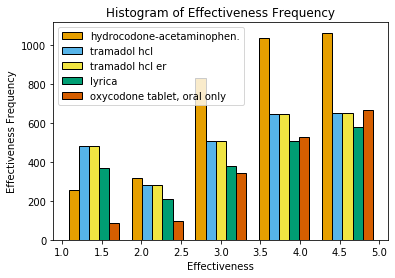

In [33]:
# Extract Effectiveness for top five drugs used  
x6 = list(df_data[df_data['Drug'] == 'hydrocodone-acetaminophen']['Effectiveness'])
x7 = list(df_data[df_data['Drug'] == 'tramadol hcl']['Effectiveness'])
x8 = list(df_data[df_data['Drug'] == 'tramadol hcl er']['Effectiveness'])
x9 = list(df_data[df_data['Drug'] == 'lyrica']['Effectiveness'])
x10 = list(df_data[df_data['Drug'] == 'oxycodone tablet, oral only']['Effectiveness'])

# Assign colors for each Drug and EaseofUse
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.hist([x6, x7, x8, x9, x10], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('Effectiveness')
plt.ylabel('Effectiveness Frequency')
plt.title('Histogram of Effectiveness Frequency')

In [ ]:
#### Frequency Histogram of Effectiveness for top five drugs among Female Users

Text(0.5, 1.0, 'Histogram of Effectiveness Frequency of Female')

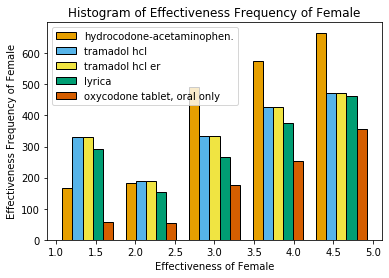

In [39]:
# Extract Effectiveness for top five drugs used  
x6 = list(df_female[df_female['Drug'] == 'hydrocodone-acetaminophen']['Effectiveness'])
x7 = list(df_female[df_female['Drug'] == 'tramadol hcl']['Effectiveness'])
x8 = list(df_female[df_female['Drug'] == 'tramadol hcl er']['Effectiveness'])
x9 = list(df_female[df_female['Drug'] == 'lyrica']['Effectiveness'])
x10 = list(df_female[df_female['Drug'] == 'oxycodone tablet, oral only']['Effectiveness'])

# Assign colors for each Drug and EaseofUse
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.hist([x6, x7, x8, x9, x10], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('Effectiveness of Female')
plt.ylabel('Effectiveness Frequency of Female')
plt.title('Histogram of Effectiveness Frequency of Female')

Text(0.5, 1.0, 'Histogram of Effectiveness Frequency of Male')

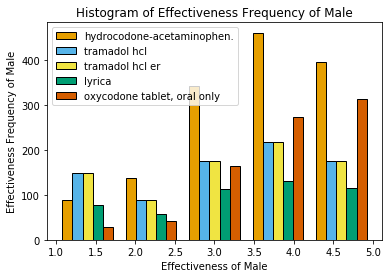

In [40]:
# Extract Effectiveness for top five drugs used  
x6 = list(df_male[df_male['Drug'] == 'hydrocodone-acetaminophen']['Effectiveness'])
x7 = list(df_male[df_male['Drug'] == 'tramadol hcl']['Effectiveness'])
x8 = list(df_male[df_male['Drug'] == 'tramadol hcl er']['Effectiveness'])
x9 = list(df_male[df_male['Drug'] == 'lyrica']['Effectiveness'])
x10 = list(df_male[df_male['Drug'] == 'oxycodone tablet, oral only']['Effectiveness'])

# Assign colors for each Drug and EaseofUse
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.hist([x6, x7, x8, x9, x10], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('Effectiveness of Male')
plt.ylabel('Effectiveness Frequency of Male')
plt.title('Histogram of Effectiveness Frequency of Male')

# 9.2 Probability Hinstogram

### Proability Histogram of top five Drug by Age

Text(0, 0.5, 'Drug Probability')

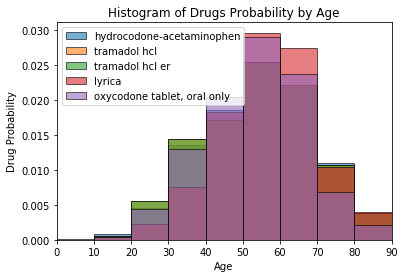

In [46]:
#figure size
#plt.figure(figsize=(10,7), dpi= 80)
bins=[0,10,20,30,40,50,60,70,80, 90]

# Iterate through each of the five drugs
for medicine in top_five:
    subset=top_five_drug[top_five_drug['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.6,edgecolor='k', density=True,
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Probability by Age'); plt.xlabel('Age'); plt.ylabel('Drug Probability')

In [ ]:
### Proability Histogram of top five Drug by Age of Female

Text(0, 0.5, 'Drug Frequency')

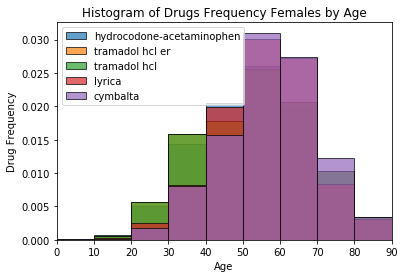

In [47]:
#figure size
#plt.figure(figsize=(10,7), dpi= 80)
bins=[0,10,20,30,40,50,60,70,80, 90]

# Iterate through each of the five drugs
for medicine in top_five_female:
    subset=top_five_drug_female[top_five_drug_female['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7,density=True, edgecolor='k',
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Frequency Females by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

In [ ]:
### Proability Histogram of top five Drug by Age of Male

Text(0, 0.5, 'Drug Frequency')

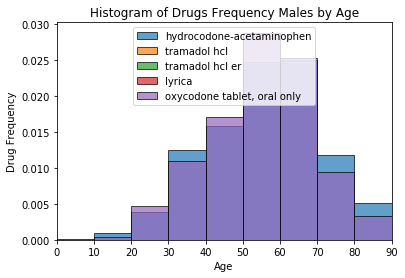

In [48]:
bins=[0,10,20,30,40,50,60,70,80, 90]

# Iterate through each of the five drugs
for medicine in top_five:
    subset=top_five_drug_male[top_five_drug_male['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, density=True, edgecolor='k',
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Frequency Males by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

In [ ]:
### Proability Histogram of EaseofUse for top five drugs

Text(0.5, 1.0, 'Histogram of EaseofUse Probability')

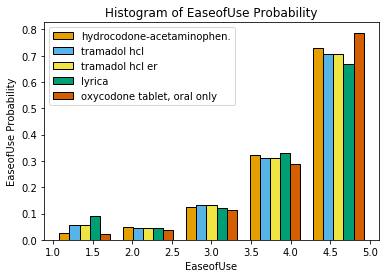

In [49]:
plt.hist([x1, x2, x3, x4, x5], bins = 5, edgecolor='k', density=True,
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse')
plt.ylabel('EaseofUse Probability')
plt.title('Histogram of EaseofUse Probability')

In [ ]:
### Proability Histogram of Effectiveness for top five drugs

Text(0.5, 1.0, 'Histogram of Effectiveness Probability')

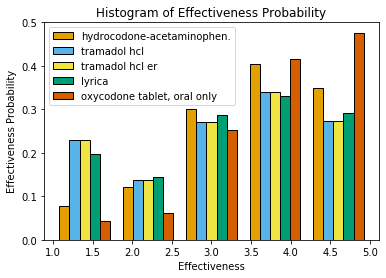

In [50]:
plt.hist([x6, x7, x8, x9, x10], bins = 5, edgecolor='k', density=True,
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('Effectiveness')
plt.ylabel('Effectiveness Probability')
plt.title('Histogram of Effectiveness Probability')

# 10 Which variable Effectiveness and EaseofUse determine the RATING of the drug 

In [ ]:
#### Commulative EaseofUse per drug in descending order

In [51]:
commulative_EaseofUse_per_drug=df_data.groupby('Drug').EaseofUse.sum().sort_values(ascending=False)

In [52]:
#to display the top 5 rows
commulative_EaseofUse_per_drug.head(5)

Drug
hydrocodone-acetaminophen    15034
tramadol hcl                 10745
tramadol hcl er              10745
lyrica                        8291
oxycodone hcl solution        7494
Name: EaseofUse, dtype: int64

In [ ]:
#### Commulative Effectiveness per drug in descending order

In [56]:
commulative_Effectiveness_per_drug=df_data.groupby('Drug').Effectiveness.sum().sort_values(ascending=False)

In [57]:
#to display the top 5 rows
commulative_Effectiveness_per_drug.head(5)

Drug
hydrocodone-acetaminophen    12843
tramadol hcl er               8374
tramadol hcl                  8374
lyrica                        6828
oxycodone hcl                 6735
Name: Effectiveness, dtype: int64

In [ ]:
#### Drug count

In [53]:
Drug_count=df_data.Drug.value_counts()

In [54]:
#to display the top 5 rows
Drug_count.head(5)

hydrocodone-acetaminophen      3504
tramadol hcl er                2557
tramadol hcl                   2557
lyrica                         2039
oxycodone tablet, oral only    1713
Name: Drug, dtype: int64

#### In order to compare the effect of EaseofUse and Effectiveness of the drug on the Rating, the commulative Easeof Use and Effectiveness should be normilized by number of drugs used since all top five the drug types are the same


In [58]:
EaseofUse_Drug_ratio = (commulative_EaseofUse_per_drug / Drug_count).sort_values(ascending=False)

In [59]:
Effectiveness_Drug_ratio=(commulative_Effectiveness_per_drug / Drug_count).sort_values(ascending=False)

#### calculate the commulative rating for each drugs for comparison porpuse

In [60]:
commulative_Rating_per_drug=df_data.groupby('Drug').Rating.sum().sort_values(ascending=False)

In [61]:
commulative_Rating_per_drug.head()

Drug
hydrocodone-acetaminophen    12475
tramadol hcl er               7862
tramadol hcl                  7862
oxycodone hcl                 6424
oxycodone hcl er              6424
Name: Rating, dtype: int64

In [62]:
Rating_Drug_ratio = (commulative_Rating_per_drug / Drug_count).sort_values(ascending=False)

In [ ]:
##### ploting the comparison graph

Text(0, 0.5, 'EaseandEffectiveness')

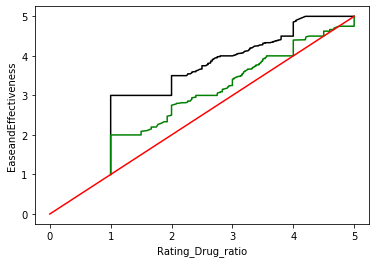

In [63]:
#Imaginary y=x function for comparison porpuse
x=[0,1,2,3,4,5]
y=[0,1,2,3,4,5]
plt.plot(Rating_Drug_ratio,EaseofUse_Drug_ratio, 'k', 
        Rating_Drug_ratio, Effectiveness_Drug_ratio, 'g',
        x,y,'-r')
plt.xlabel('Rating_Drug_ratio')
plt.ylabel('EaseandEffectiveness')

In [ ]:
###### Looking at the comparison plot: drug effectiveness variable can determine the rating of the drug over the EaseofUse.